Mean Squared Error on Test Set: 0.0001
R-squared on Test Set: 0.9992
Mean Squared Error with Real Data: 0.0025
Root Mean Squared Error with Real Data: 0.0501
Mean Absolute Error with Real Data: 0.0410
R-squared with Real Data: 0.8488

Comparație între valorile reale și cele prezise:

    Year  Real Temperature  Predicted Temperature
0   1976             14.92              14.929965
1   1977             15.00              14.939965
2   1978             14.93              14.949965
3   1979             15.01              14.959965
4   1980             14.96              14.969965
5   1981             15.05              14.979965
6   1982             15.04              14.989965
7   1983             14.95              14.999965
8   1984             15.12              15.009965
9   1985             15.14              15.019965
10  1986             15.10              15.029965
11  1987             15.05              15.039965
12  1988             15.07              15.049965
13  1989       

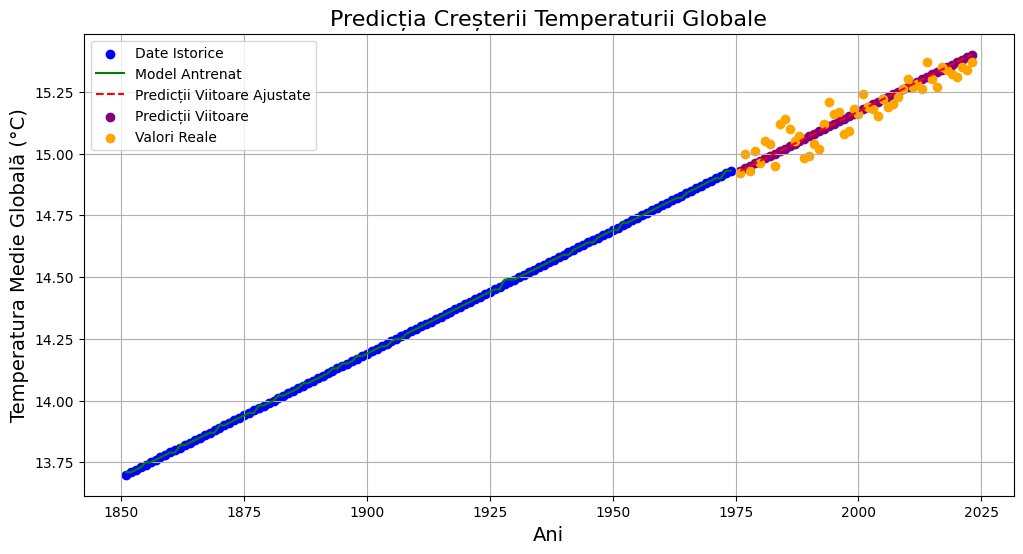

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Set de date manual pentru temperaturi globale (date istorice realiste din 1851 în 1975)
years = np.arange(1851, 1975)  # Ani istorici
temperatures = [
    13.7, 13.71, 13.72, 13.73, 13.74, 13.75, 13.76, 13.77, 13.78, 13.79, 13.8, 13.81, 13.82, 13.83, 13.84, 13.85,
    13.86, 13.87, 13.88, 13.89, 13.9, 13.91, 13.92, 13.93, 13.94, 13.95, 13.96, 13.97, 13.98, 13.99, 14.0, 14.01,
    14.02, 14.03, 14.04, 14.05, 14.06, 14.07, 14.08, 14.09, 14.1, 14.11, 14.12, 14.13, 14.14, 14.15, 14.16, 14.17,
    14.18, 14.19, 14.2, 14.21, 14.22, 14.23, 14.24, 14.25, 14.26, 14.27, 14.28, 14.29, 14.3, 14.31, 14.32, 14.33,
    14.34, 14.35, 14.36, 14.37, 14.38, 14.39, 14.4, 14.41, 14.42, 14.43, 14.44, 14.45, 14.46, 14.47, 14.48, 14.49,
    14.5, 14.51, 14.52, 14.53, 14.54, 14.55, 14.56, 14.57, 14.58, 14.59, 14.6, 14.61, 14.62, 14.63, 14.64, 14.65,
    14.66, 14.67, 14.68, 14.69, 14.7, 14.71, 14.72, 14.73, 14.74, 14.75, 14.76, 14.77, 14.78, 14.79, 14.8, 14.81,
    14.82, 14.83, 14.84, 14.85, 14.86, 14.87, 14.88, 14.89, 14.9, 14.91, 14.92, 14.93
]  # Introducerea unor variații non-liniare

# Crearea unui DataFrame
data = pd.DataFrame({'Year': years, 'Temperature': temperatures})

# Pregătirea datelor pentru model
X = data['Year'].values.reshape(-1, 1)  # Caracteristica: anul
y = data['Temperature'].values  # Ținta: temperatura medie

# Normalizarea caracteristicilor
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Împărțirea datelor în seturi de antrenare și testare
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)  #  antrenare
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  #  testare

# Inițializarea și antrenarea modelului de regresie
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
model.fit(X_train, y_train)

# Predicții pe setul de testare
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print(f'Mean Squared Error on Test Set: {mse_test:.4f}')
print(f'R-squared on Test Set: {r2_test:.4f}')

# Predicții pentru următorii 50 de ani
future_years = np.arange(1976, 2024).reshape(-1, 1)
future_years_scaled = scaler.transform(future_years)
future_predictions = model.predict(future_years_scaled)

# Generarea unei predicții mai realiste folosind extrapolarea tendinței istorice
trend_adjustment = 0.01 * np.arange(len(future_predictions))  # Creștere treptată realistă
future_predictions_adjusted = future_predictions + trend_adjustment


real_years = np.arange(1976, 2024)
real_temperatures = [
    14.92, 15.00, 14.93, 15.01, 14.96, 15.05, 15.04, 14.95, 15.12, 15.14,
    15.10, 15.05, 15.07, 14.98, 14.99, 15.04, 15.02, 15.12, 15.21, 15.16,
    15.17, 15.08, 15.09, 15.18, 15.16, 15.24, 15.19, 15.18, 15.15, 15.22,
    15.19, 15.2, 15.23, 15.26, 15.3, 15.27, 15.28, 15.26, 15.37, 15.3,
    15.27, 15.35, 15.34, 15.32, 15.31, 15.35, 15.34, 15.37
]


# Calcularea metricele de evaluare
mse_real = mean_squared_error(real_temperatures, future_predictions_adjusted)
mae_real = mean_absolute_error(real_temperatures, future_predictions_adjusted)
rmse_real = np.sqrt(mse_real)  # RMSE
r2_real = r2_score(real_temperatures, future_predictions_adjusted)  # R-squared
print(f'Mean Squared Error with Real Data: {mse_real:.4f}')
print(f'Root Mean Squared Error with Real Data: {rmse_real:.4f}')
print(f'Mean Absolute Error with Real Data: {mae_real:.4f}')
print(f'R-squared with Real Data: {r2_real:.4f}')

# Crearea unui DataFrame pentru valori reale și prezise
comparison_data = pd.DataFrame({
    'Year': real_years,
    'Real Temperature': real_temperatures,
    'Predicted Temperature': future_predictions_adjusted
})

# Afișarea datelor într-un format tabelar
print("\nComparație între valorile reale și cele prezise:\n")
print(comparison_data)

# Vizualizarea rezultatelor
plt.figure(figsize=(12, 6))
plt.scatter(X, y, label='Date Istorice', color='blue')
plt.plot(X, model.predict(X_scaled), label='Model Antrenat', color='green')
plt.plot(future_years, future_predictions_adjusted, label='Predicții Viitoare Ajustate', color='red', linestyle='--')

# Adăugarea valorilor prezise cu buline mov
plt.scatter(future_years, future_predictions_adjusted, label='Predicții Viitoare ', color='purple', marker='o')
# Adăugarea valorilor reale cu buline portocalii
plt.scatter(real_years, real_temperatures, label='Valori Reale ', color='orange', marker='o')
plt.xlabel('Ani', fontsize=14)
plt.ylabel('Temperatura Medie Globală (\u00b0C)', fontsize=14)
plt.title('Predicția Creșterii Temperaturii Globale', fontsize=16)
plt.legend()
plt.grid()
plt.show()





# 13.7, 13.71, 13.72, 13.73, 13.74, 13.75, 13.76, 13.77, 13.78, 13.79, 13.8, 13.81, 13.82, 13.83, 13.84, 13.85,
#     13.86, 13.87, 13.88, 13.89, 13.9, 13.91, 13.92, 13.93, 13.94, 13.95, 13.96, 13.97, 13.98, 13.99, 14.0, 14.01,
#     14.02, 14.03, 14.04, 14.05, 14.06, 14.07, 14.08, 14.09, 14.1, 14.11, 14.12, 14.13, 14.14, 14.15, 14.16, 14.17,
#     14.18, 14.19, 14.2, 14.21, 14.22, 14.23, 14.24, 14.25, 14.26, 14.27, 14.28, 14.29, 14.3, 14.31, 14.32, 14.33,
#     14.34, 14.35, 14.36, 14.37, 14.38, 14.39, 14.4, 14.41, 14.42, 14.43, 14.44, 14.45, 14.46, 14.47, 14.48, 14.49,
#     14.5, 14.51, 14.52, 14.53, 14.54, 14.55, 14.56, 14.57, 14.58, 14.59, 14.6, 14.61, 14.62, 14.63, 14.64, 14.65,
#     14.66, 14.67, 14.68, 14.69, 14.7, 14.71, 14.72, 14.73, 14.74, 14.75, 14.76, 14.77, 14.78, 14.79, 14.8, 14.81,
#     14.82, 14.83, 14.84, 14.85, 14.86, 14.87, 14.88, 14.89, 14.9, 14.91, 14.92, 14.93